## 1.读取数据

In [1]:
# Read data in txt files in batches.
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) #show all columns
pd.set_option('display.max_columns', 100) #show 100 lines
pd.set_option('display.width', 5000) #Set the display width to avoid text wrapping 

def read_data_batches(dir_name, data_title):
    path = "E:\\ProgramNew\\Pfile_jupyter\\Module21\\UBW_data"
    datapath = os.path.join(path, dir_name, "")
    # print(datapath)

    files = os.listdir(datapath)    # Get all names in this folder
    print("Total file: " + str(len(files)))
    txts = []
    txts.append(data_title)
#     i = 0

    for file in files:
        position = os.path.join(datapath, file)  # Construct an absolute path
        # Get the index for the file
        file_index = file.split('.')[0]

        # Read file
        with open(position, "r", encoding='UTF-8') as f:
            lines = f.readlines()
#             if i == 0:
#                 line_title = lines[0]
#                 line_title = line_title.split(':')
#                 line_title.append('FileIndex')
#                 txts.append(line_title)
            for line in lines[1:]:
                line=line.strip('\n')
                line_split = line.split(':')
                line_split.append(file_index)
                txts.append(line_split)
#             i = i + 1
            f.close()

    return txts

In [2]:
# Construct a CSV file
import csv
import codecs

def data_write_csv(file_name, datas):
#     file_csv = codecs.open(file_name, 'w', 'utf-8')
#     writer = csv.writer(file_csv, delimiter=' ', quotechar=' ', quoting=csv.QUOTE_MINIMAL)
#     for data in datas:
#         writer.writerow(data)
#     print("File saved, processing end!")

    f = open(file_name, 'w', encoding='utf-8', newline='')
    writer = csv.writer(f)
    for data in datas:
        writer.writerow(data)
    f.close
    print("File saved, processing end!")

In [3]:
data_txt = []
original_data_title = ["T", "Time", "RangeReport", "TagID", "AnchorID", "Dis", "DisCheck", "DataSerialNum", "DataNum", "FileIndex"]
data_txt = read_data_batches("异常数据", original_data_title)
print(len(data_txt))

Total file: 324
316705


In [4]:
data_write_csv('abnormal.csv', data_txt)

File saved, processing end!


In [5]:
print(data_txt[:5])

[['T', 'Time', 'RangeReport', 'TagID', 'AnchorID', 'Dis', 'DisCheck', 'DataSerialNum', 'DataNum', 'FileIndex'], ['T', '090531088', 'RR', '0', '0', '1280', '1280', '229', '3301', '1'], ['T', '090531088', 'RR', '0', '1', '4550', '4550', '229', '3301', '1'], ['T', '090531088', 'RR', '0', '2', '4550', '4550', '229', '3301', '1'], ['T', '090531088', 'RR', '0', '3', '6300', '6300', '229', '3301', '1']]


## 2.展示数据的信息

In [6]:
pd_data_txt = pd.DataFrame(data_txt[1:], columns=data_txt[0])
print("Head entries of data:")
print(pd_data_txt.head())
print(60 * '#')
print("The shape of data:")
print(pd_data_txt.shape)

Head entries of data:
   T       Time RangeReport TagID AnchorID   Dis DisCheck DataSerialNum DataNum FileIndex
0  T  090531088          RR     0        0  1280     1280           229    3301         1
1  T  090531088          RR     0        1  4550     4550           229    3301         1
2  T  090531088          RR     0        2  4550     4550           229    3301         1
3  T  090531088          RR     0        3  6300     6300           229    3301         1
4  T  090531296          RR     0        0  1260     1260           230    3302         1
############################################################
The shape of data:
(316704, 10)


In [7]:
print("The describe of data:")
print(pd_data_txt.describe())
print(60 * '#')
print("Information for data:")
print(pd_data_txt.info())

The describe of data:
             T       Time RangeReport   TagID AnchorID     Dis DisCheck DataSerialNum DataNum FileIndex
count   316704     316704      316704  316704   316704  316704   316704        316704  316704    316704
unique       1      95503           1       1        4     694      694           256   44679       324
top          T  151523504          RR       0        3    4550     4550           233    4429       227
freq    316704         19      316704  316704    79176    2883     2883          1296      28      2112
############################################################
Information for data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316704 entries, 0 to 316703
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   T              316704 non-null  object
 1   Time           316704 non-null  object
 2   RangeReport    316704 non-null  object
 3   TagID          316704 non-null  object


In [8]:
# show something useful information of data
def show_unique_miss(mydata):
    stats = []
    for col in mydata.columns:
        stats.append((col, mydata[col].nunique(),
                     mydata[col].isnull().sum() * 100/mydata.shape[0], 
                     mydata[col].value_counts(normalize=True, dropna=False).values[0] * 100,
                     mydata[col].dtype))
        stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 
                                               'Percentage of values in the biggest category', 'type'])

#     plot the missing infromation
#     missing = mydata.isnull().sum()
#     missing = missing[missing > 0]
#     missing.sort_values(inplace=True)
#     missing.plot.bar()
    
    return stats_df.sort_values('Percentage of missing values', ascending=False)

**Note：** 
1. nunique值为1是不具备任何意义的，各种值都一样，不存在区分性，应当删除
2. 变量缺失值很多，如达到95%以上，亦可以考虑删除

下面将调用方法统计不同特征的unique值和缺失值信息

In [9]:
data_unique_miss = show_unique_miss(pd_data_txt)
data_unique_miss

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,T,1,0.0,100.000000,object
1,Time,95503,0.0,0.005999,object
2,RangeReport,1,0.0,100.000000,object
3,TagID,1,0.0,100.000000,object
4,AnchorID,4,0.0,25.000000,object
5,Dis,694,0.0,0.910314,object
6,DisCheck,694,0.0,0.910314,object
7,DataSerialNum,256,0.0,0.409215,object
8,DataNum,44679,0.0,0.008841,object
9,FileIndex,324,0.0,0.666869,object


# 3.四合一构造数据集

结合上面表格分析,可以将Unique_values值为1的特征删除,也意味着:T\RangeReport和TagID将被删除

In [10]:
pd_data_new = pd_data_txt.drop(['T', 'RangeReport', 'TagID'], axis = 1)
pd_data_new.head()

,Time,AnchorID,Dis,DisCheck,DataSerialNum,DataNum,FileIndex
0,090531088,0,1280,1280,229,3301,1
1,090531088,1,4550,4550,229,3301,1
2,090531088,2,4550,4550,229,3301,1
3,090531088,3,6300,6300,229,3301,1
4,090531296,0,1260,1260,230,3302,1


In [11]:
# Operate on the original data, and merge 1 set of test results into one line.
data_txt_new = pd_data_new.values.tolist()
data_txt_new[:5]

[['090531088', '0', '1280', '1280', '229', '3301', '1'],
 ['090531088', '1', '4550', '4550', '229', '3301', '1'],
 ['090531088', '2', '4550', '4550', '229', '3301', '1'],
 ['090531088', '3', '6300', '6300', '229', '3301', '1'],
 ['090531296', '0', '1260', '1260', '230', '3302', '1']]

In [12]:
# fout lines merget to one line
def four_merge_one(mydatas, data_title):
    newdata = []
    newdata.append(data_title)
    # Append other data
    key_append = 0
    data = []
    for mydata in mydatas:
        if key_append == int(mydata[1]):
            if key_append == 0:
                data.extend(mydata[0:4])
                key_append = key_append+1
            elif key_append == 1:
                data.extend(mydata[1:4])
                key_append = key_append+1
            elif key_append == 2:
                data.extend(mydata[1:4])
                key_append = key_append+1
            else:
                data.extend(mydata[1:])
                key_append = 0
                newdata.append(data)
                data = []
        else:        
            newdata.append(data)
            data = []
            key_append = int(mydata[1])
            data.extend(mydata[0:4])
            key_append = key_append+1
            
    return newdata

In [13]:
merge_data_title = []
merge_data_title = ["Time", "AnchorID0", "Dis0", "DisCheck0", "AnchorID1", "Dis1", "DisCheck1",
                "AnchorID2", "Dis2", "DisCheck2", "AnchorID3", "Dis3", "DisCheck3", "DataSerialNum", "DataNum", "FileIndex"]

merge_data = four_merge_one(data_txt_new, merge_data_title)

print("Total: " + str(len(merge_data)))
data_write_csv('abnormal_merge.csv', merge_data)

Total: 79177
File saved, processing end!


In [14]:
pd_data_merge = pd.DataFrame(merge_data[1:], columns=merge_data[0])
pd_data_merge.head()

,Time,AnchorID0,Dis0,DisCheck0,AnchorID1,Dis1,DisCheck1,AnchorID2,Dis2,DisCheck2,AnchorID3,Dis3,DisCheck3,DataSerialNum,DataNum,FileIndex
0,090531088,0,1280,1280,1,4550,4550,2,4550,4550,3,6300,6300,229,3301,1
1,090531296,0,1260,1260,1,4550,4550,2,4550,4550,3,6300,6300,230,3302,1
2,090531513,0,1250,1250,1,4550,4550,2,4550,4550,3,6300,6300,231,3303,1
3,090531711,0,1240,1240,1,4550,4550,2,4550,4550,3,6300,6300,232,3304,1
4,090531920,0,1240,1240,1,4550,4550,2,4550,4550,3,6300,6300,233,3305,1


**新的DataFram重新分析一遍**

In [15]:
print("Head entries of data:")
print(pd_data_merge.head())
print(60 * '#')
print("The shape of data:")
print(pd_data_merge.shape)

Head entries of data:
        Time AnchorID0  Dis0 DisCheck0 AnchorID1  Dis1 DisCheck1 AnchorID2  Dis2 DisCheck2 AnchorID3  Dis3 DisCheck3 DataSerialNum DataNum FileIndex
0  090531088         0  1280      1280         1  4550      4550         2  4550      4550         3  6300      6300           229    3301         1
1  090531296         0  1260      1260         1  4550      4550         2  4550      4550         3  6300      6300           230    3302         1
2  090531513         0  1250      1250         1  4550      4550         2  4550      4550         3  6300      6300           231    3303         1
3  090531711         0  1240      1240         1  4550      4550         2  4550      4550         3  6300      6300           232    3304         1
4  090531920         0  1240      1240         1  4550      4550         2  4550      4550         3  6300      6300           233    3305         1
############################################################
The shape of data:
(791

In [16]:
print("The describe of data:")
print(pd_data_merge.describe())
print(60 * '#')
print("Information for data:")
print(pd_data_merge.info())

The describe of data:
             Time AnchorID0   Dis0 DisCheck0 AnchorID1   Dis1 DisCheck1 AnchorID2   Dis2 DisCheck2 AnchorID3   Dis3 DisCheck3 DataSerialNum DataNum FileIndex
count       79176     79176  79176     79176     79176  79176     79176     79176  79176     79176     79176  79176     79176         79176   79176     79176
unique      79016         1    648       648         1    616       616         1    642       642         1    613       613           256   44679       324
top     151523508         0   4550      4550         1   3580      3580         2   4550      4550         3   4550      4550           233    4448       227
freq            5     79176    650       650     79176    723       723     79176    937       937     79176    650       650           324       7       528
############################################################
Information for data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79176 entries, 0 to 79175
Data columns (total 16 column

In [17]:
data_unique_miss = show_unique_miss(pd_data_merge)
data_unique_miss

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,Time,79016,0.0,0.006315,object
1,AnchorID0,1,0.0,100.000000,object
2,Dis0,648,0.0,0.820956,object
3,DisCheck0,648,0.0,0.820956,object
4,AnchorID1,1,0.0,100.000000,object
5,Dis1,616,0.0,0.913156,object
6,DisCheck1,616,0.0,0.913156,object
7,AnchorID2,1,0.0,100.000000,object
8,Dis2,642,0.0,1.183439,object
9,DisCheck2,642,0.0,1.183439,object


**Note:** 其实这里的AnchorID(0-4)其实仍然是只有一个值,那个这个其实是没有意义的,可以删除,然后校验值和测试值可能相似度很高,给张图就可以说明问题,然后保留一个就好,就是这个DataSerialNum就是从0~255,不晓得会有什么结果

In [18]:
# Delete features that nunique = 1
pd_data_merge2 = pd_data_merge.drop(['AnchorID0', 'AnchorID1', 'AnchorID2', 'AnchorID3'], axis = 1)
pd_data_merge2.head()

,Time,Dis0,DisCheck0,Dis1,DisCheck1,Dis2,DisCheck2,Dis3,DisCheck3,DataSerialNum,DataNum,FileIndex
0,090531088,1280,1280,4550,4550,4550,4550,6300,6300,229,3301,1
1,090531296,1260,1260,4550,4550,4550,4550,6300,6300,230,3302,1
2,090531513,1250,1250,4550,4550,4550,4550,6300,6300,231,3303,1
3,090531711,1240,1240,4550,4550,4550,4550,6300,6300,232,3304,1
4,090531920,1240,1240,4550,4550,4550,4550,6300,6300,233,3305,1


In [19]:
print("The shape of data:")
print(pd_data_merge2.shape)
print(60 * '#')
print("The describe of data:")
print(pd_data_merge2.describe())
print(60 * '#')
print("Information for data:")
print(pd_data_merge2.info())

The shape of data:
(79176, 12)
############################################################
The describe of data:
             Time   Dis0 DisCheck0   Dis1 DisCheck1   Dis2 DisCheck2   Dis3 DisCheck3 DataSerialNum DataNum FileIndex
count       79176  79176     79176  79176     79176  79176     79176  79176     79176         79176   79176     79176
unique      79016    648       648    616       616    642       642    613       613           256   44679       324
top     151523508   4550      4550   3580      3580   4550      4550   4550      4550           233    4448       227
freq            5    650       650    723       723    937       937    650       650           324       7       528
############################################################
Information for data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79176 entries, 0 to 79175
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Time         

In [20]:
data_txt_merge2 = []
data_txt_merge2.append(pd_data_merge2.columns.tolist())
data_txt_merge2 += pd_data_merge2.values.tolist()
data_write_csv('abnormal_merge2.csv', data_txt_merge2)

File saved, processing end!


## 4.变量分析

对于连续性单变量可视化查看观察值的分布

array([[<AxesSubplot:title={'center':'Dis0'}>,
        <AxesSubplot:title={'center':'DisCheck0'}>,
        <AxesSubplot:title={'center':'Dis1'}>],
       [<AxesSubplot:title={'center':'DisCheck1'}>,
        <AxesSubplot:title={'center':'Dis2'}>,
        <AxesSubplot:title={'center':'DisCheck2'}>],
       [<AxesSubplot:title={'center':'Dis3'}>,
        <AxesSubplot:title={'center':'DisCheck3'}>, <AxesSubplot:>]],
      dtype=object)

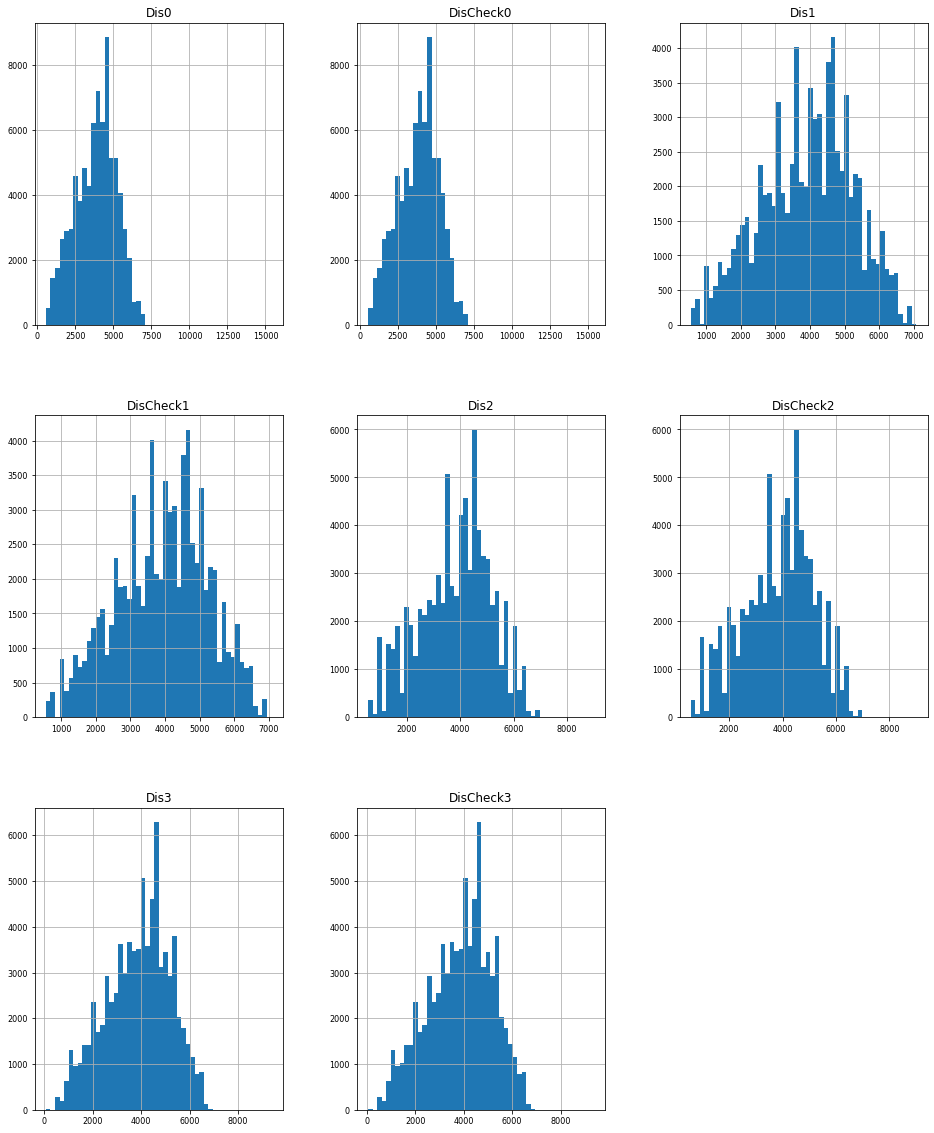

In [21]:
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

pd_data_merge2 = pd_data_merge2.apply(pd.to_numeric, errors='ignore')
# print(pd_data_merge2.info())
df_num = pd_data_merge2.select_dtypes(include=['float64', 'int64'])
df_num = df_num[df_num.columns.tolist()[1:9]]
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8,ylabelsize=8)

相关性分析

<AxesSubplot:>

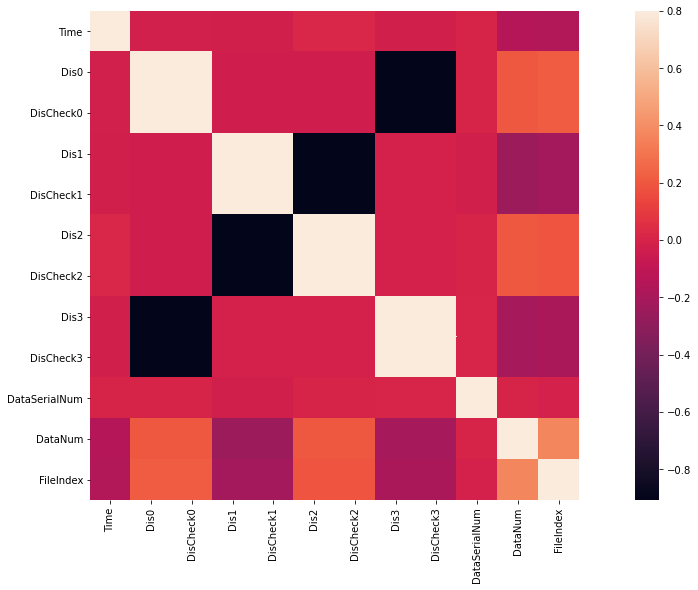

In [22]:
corrmat = pd_data_merge2.corr()
f, ax = plt.subplots(figsize=(20,9))
sns.heatmap(corrmat, vmax=0.8, square=True)

距离值与距离校验值完全是正相关的,且相关值接近1,可以将校验值删除

In [23]:
# Delete features that Positive correlation
pd_data_merge3 = pd_data_merge2.drop(['DisCheck0', 'DisCheck1', 'DisCheck2', 'DisCheck3'], axis = 1)
print(pd_data_merge3.shape)
pd_data_merge3.head()

(79176, 8)


,Time,Dis0,Dis1,Dis2,Dis3,DataSerialNum,DataNum,FileIndex
0,90531088,1280,4550,4550,6300,229,3301,1
1,90531296,1260,4550,4550,6300,230,3302,1
2,90531513,1250,4550,4550,6300,231,3303,1
3,90531711,1240,4550,4550,6300,232,3304,1
4,90531920,1240,4550,4550,6300,233,3305,1


In [24]:
data_txt_merge3 = []
data_txt_merge3.append(pd_data_merge3.columns.tolist())
data_txt_merge3 += pd_data_merge3.values.tolist()
data_write_csv('abnormal_merge3.csv', data_txt_merge3)

File saved, processing end!


array([[<AxesSubplot:title={'center':'Dis0'}>,
        <AxesSubplot:title={'center':'Dis1'}>],
       [<AxesSubplot:title={'center':'Dis2'}>,
        <AxesSubplot:title={'center':'Dis3'}>]], dtype=object)

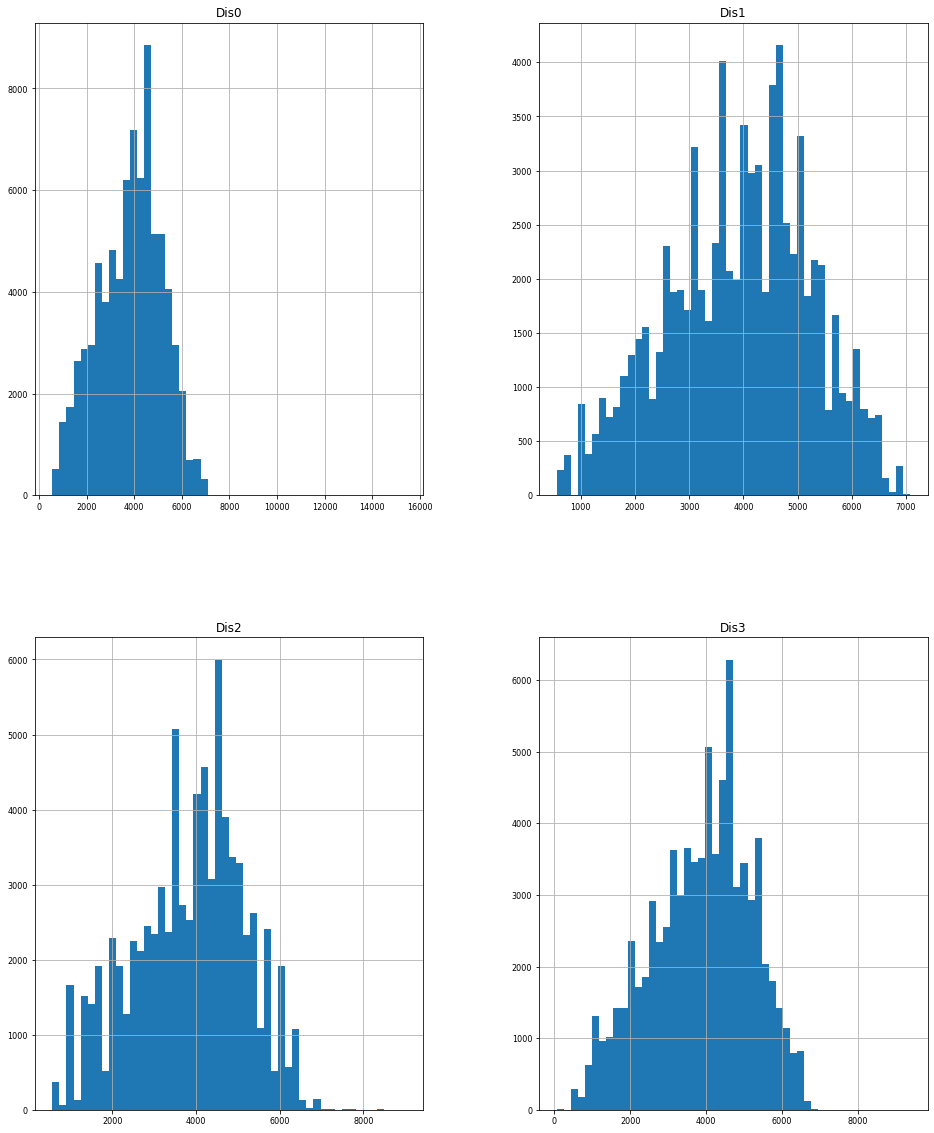

In [25]:
pd_data_merge3 = pd_data_merge3.apply(pd.to_numeric, errors='ignore')
# print(pd_data_merge2.info())
df_num = pd_data_merge3.select_dtypes(include=['float64', 'int64'])
df_num = df_num[df_num.columns.tolist()[1:5]]
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8,ylabelsize=8)

## 加上标签